# Classical import

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt

import georges
from georges.manzoni import Input, Beam
from georges.manzoni.integrators import *
from georges.manzoni import observers
from georges import vis

_ureg = georges.ureg

## Define a sequence with drifts, quadrupoles and sbend

In [2]:
integrator = MadXIntegrator
aper1 = 10
aper2 = 15

In [3]:
d1 = georges.Element.Drift(NAME="D1",
                           integrator=integrator,
                           L=0.3* _ureg.m,
                           APERTYPE="RECTANGULAR",
                           APERTURE=[aper1*_ureg.cm, aper2*_ureg.cm])

qf = georges.Element.Quadrupole(NAME="Q1",
                                integrator=integrator,
                                L=0.3*_ureg.m,
                                K1=2*_ureg.m**-2,
                                APERTYPE="RECTANGULAR",
                                APERTURE=[aper1*_ureg.cm, aper2*_ureg.cm])

d2 = georges.Element.Drift(NAME="D2",
                           integrator=integrator,
                           L=0.3*_ureg.m,
                           APERTYPE="CIRCULAR",
                           APERTURE=[aper1*_ureg.cm, aper1*_ureg.cm])

b1 = georges.Element.SBend(NAME="B1",
                           integrator=integrator,
                           L=1*_ureg.m,
                           ANGLE=30*_ureg.degrees,
                           K1=0*_ureg.m**-2,
                           APERTYPE="CIRCULAR",
                           APERTURE=[aper1*_ureg.cm, aper1*_ureg.cm])

d3 = georges.Element.Drift(NAME="D3",
                           integrator=integrator,
                           L=0.3*_ureg.m,
                           APERTYPE="CIRCULAR",
                           APERTURE=[aper1*_ureg.cm, aper1*_ureg.cm])

qd = georges.Element.Quadrupole(NAME="Q2",
                                integrator=integrator,
                                L=0.3*_ureg.m,
                                K1=-2*_ureg.m**-2,
                                APERTYPE="RECTANGULAR",
                                APERTURE=[aper1*_ureg.cm, aper2*_ureg.cm])

d4 = georges.Element.Drift(NAME="D4",
                           integrator=integrator,
                           L=0.3*_ureg.m,
                           APERTYPE="CIRCULAR",
                           APERTURE=[aper1*_ureg.cm, aper1*_ureg.cm])

b2 = georges.Element.SBend(NAME="B2",
                           integrator=integrator,
                           L=1*_ureg.m,
                           ANGLE=-30*_ureg.degrees,
                           K1=0*_ureg.m**-2,
                           APERTYPE="RECTANGULAR",
                           APERTURE=[aper1*_ureg.cm, aper2*_ureg.cm])

d5 = georges.Element.Drift(NAME="D5",
                           integrator=integrator,
                           L=0.3*_ureg.m,
                           APERTYPE="CIRCULAR",
                           APERTURE=[aper1*_ureg.cm, aper1*_ureg.cm])

sequence = georges.PlacementSequence(name="Sequence")

sequence.place(d1,at_entry=0*_ureg.m)
sequence.place_after_last(qf)
sequence.place_after_last(d2)
sequence.place_after_last(b1)
sequence.place_after_last(d3)
sequence.place_after_last(qd)
sequence.place_after_last(d4)
sequence.place_after_last(b2)
sequence.place_after_last(d5);

### Define the kinematics and the beam distribution

In [4]:
kin = georges.Kinematics(230 * _ureg.MeV,
                         particle=georges.particles.Proton, 
                         kinetic=True)

# Add kinematics to the sequence
sequence.metadata.kinematics=kin

In [5]:
beam = Beam(kinematics=kin,
            distribution=georges.generate_from_5d_sigma_matrix(n=10000, 
                                                               s11=0.001,
                                                               s22=0.001,
                                                               s33=0.005)
           )

## Track the line with different observers

In [6]:
mi = Input.from_sequence(sequence=sequence)
beam_observer_std = mi.track(beam=beam, observers=observers.SigmaObserver())
beam_observer_mean = mi.track(beam=beam, observers=observers.MeanObserver())
beam_observer_beam = mi.track(beam=beam, observers=observers.BeamObserver(with_input_beams=True))
beam_observer_losses = mi.track(beam=beam, observers=observers.LossesObserver())

/Users/rtesse/reps/ULB-Metronu/python_libs/georges/georges-src/georges/manzoni/input.py:131: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.

/Users/rtesse/reps/ULB-Metronu/python_libs/georges/georges-src/georges/manzoni/input.py:131: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.

/Users/rtesse/reps/ULB-Metronu/python_libs/georges/georges-src/georges/manzoni/input.py:131: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.

/Users/rtesse/reps/ULB-Metronu/python_libs/georges/georges-src/georges/manzoni/input.py:131: FutureWarning:

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.

/Users/rtesse/reps/ULB-Metronu/python_libs/georges/georges-src/georges/manzoni/input.py:131: FutureWarning:

Passing a set as an indexer is deprecated and will raise in

## Plotting

We can display the results with the Matplotlib or the Plotly librairies 

### Mean observer

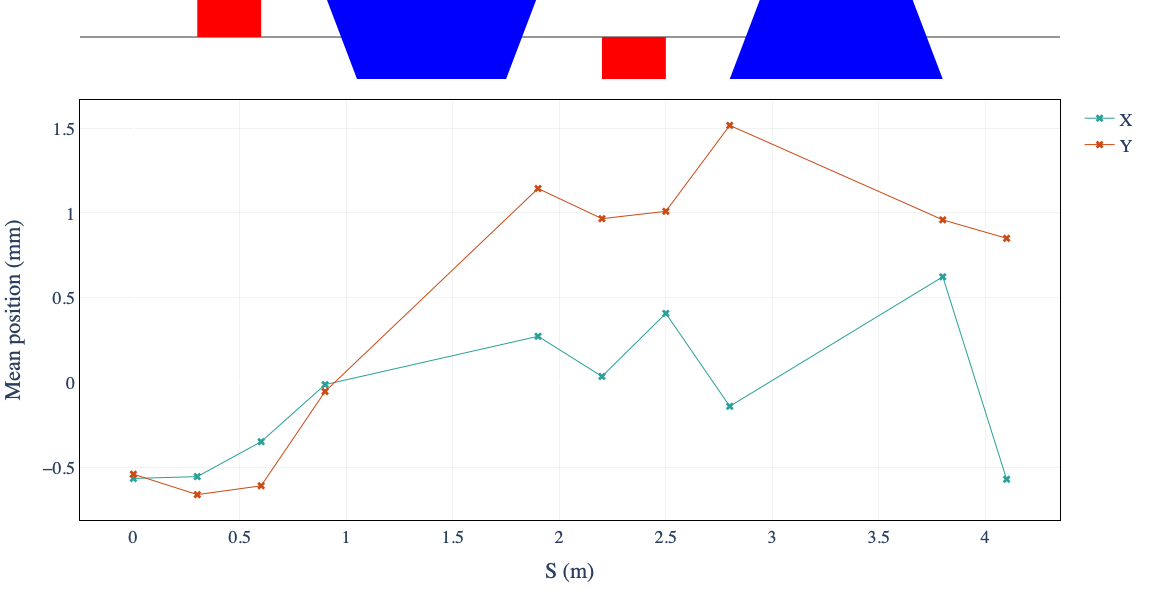

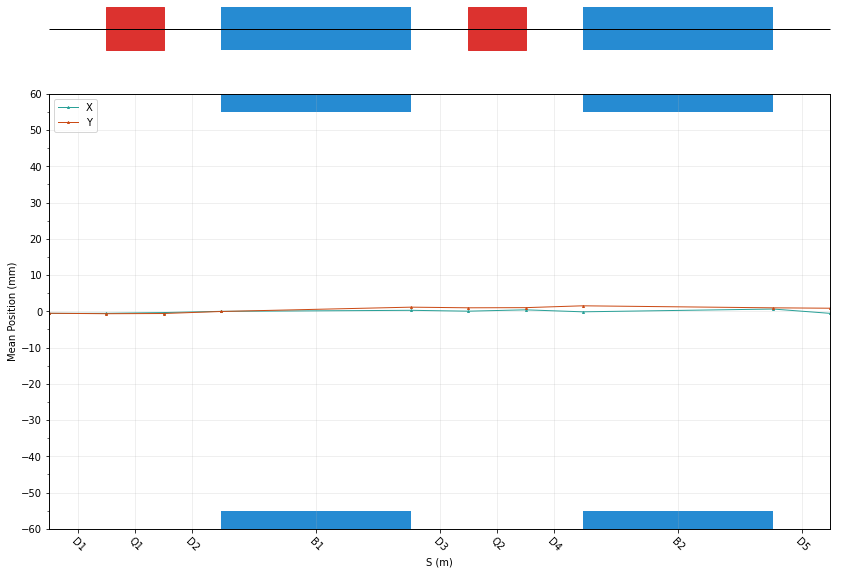

In [13]:
# Using Plotly
manzoni_plot = vis.ManzoniPlotlyArtist(width=800, height=600)
manzoni_plot.plot_cartouche(sequence.df, unsplit_bends=False, vertical_position=1.15)
manzoni_plot.tracking(beam_observer_mean, plane='X') 
manzoni_plot.tracking(beam_observer_mean, plane='Y') 
manzoni_plot.fig['data'][0]['showlegend'] = True
manzoni_plot.fig['data'][1]['showlegend'] = True
manzoni_plot.render()
manzoni_plot.save("figures/mean_observer_plotly.png", file_format='png')

# Using matplotlib
plt.rc('text', usetex=False)
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
manzoni_plot = vis.ManzoniMatplotlibArtist(ax=ax)
manzoni_plot.plot_cartouche(sequence.df) # Preparation of the plot
manzoni_plot.plot_beamline(sequence.df, print_label=True, with_aperture=True) # Preparation of the plot
manzoni_plot.tracking(beam_observer_mean, plane='X')
manzoni_plot.tracking(beam_observer_mean, plane='Y')
ax.legend(loc='upper left')
fig.savefig("figures/mean_observer_matplotlib.png")

### Std observer

#### At a specific plane

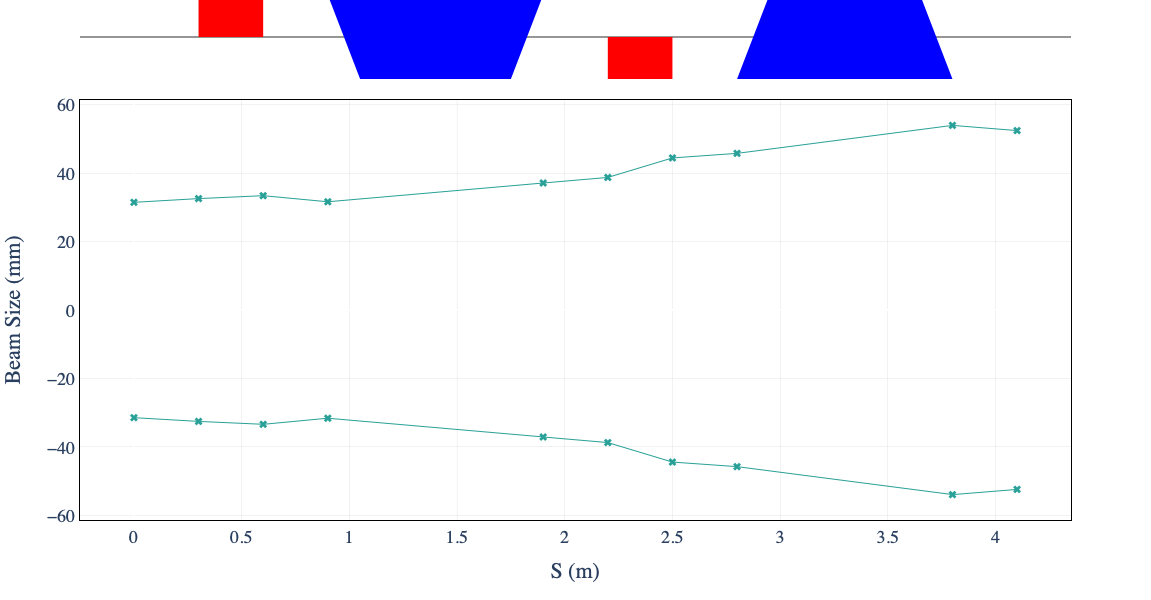

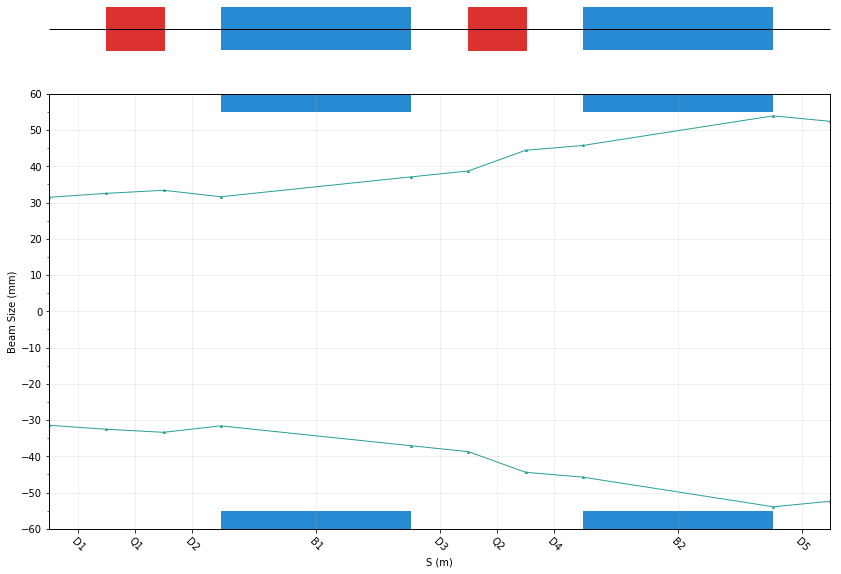

In [15]:
# Using Plotly
manzoni_plot = vis.ManzoniPlotlyArtist(width=800, height=600)
manzoni_plot.plot_cartouche(sequence.df, unsplit_bends=False, vertical_position=1.15)
manzoni_plot.tracking(beam_observer_std, plane='X', fill_between=False) 
manzoni_plot.render()
manzoni_plot.save("figures/std_observer_plotly.png", file_format='png')


# Using matplotlib
plt.rc('text', usetex=False)
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
manzoni_plot = vis.ManzoniMatplotlibArtist(ax=ax)
manzoni_plot.plot_cartouche(sequence.df)
manzoni_plot.plot_beamline(sequence.df, print_label=True, with_aperture=True, plane='both') # Preparation of the plot
manzoni_plot.tracking(beam_observer_std, plane='X', fill_between=False)
fig.savefig("figures/std_observer_matplotlib.png")

#### For both planes

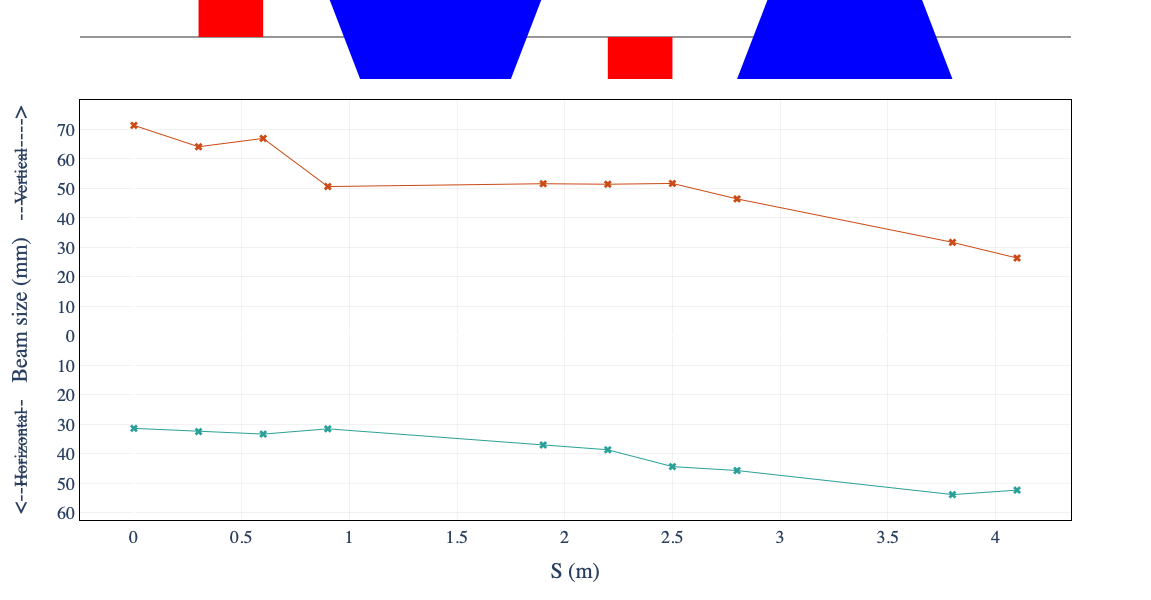

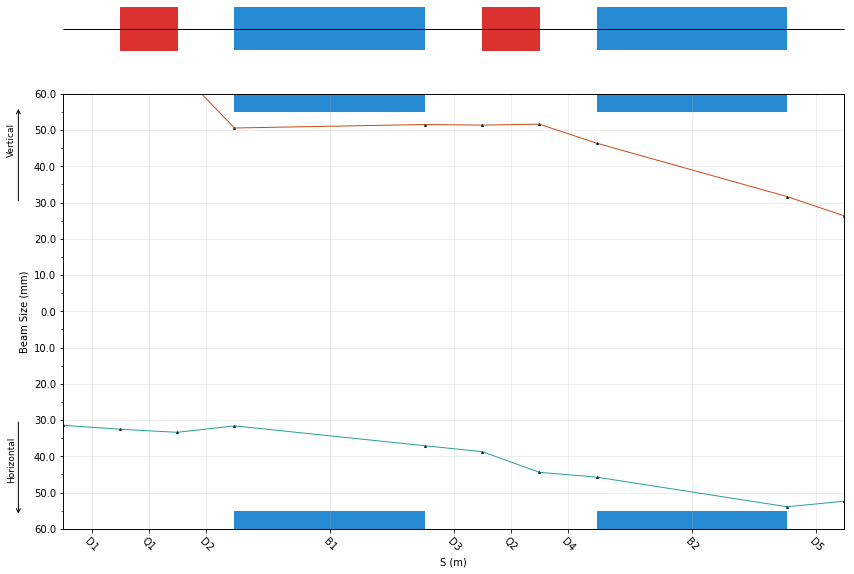

In [16]:
# Using Plotly
manzoni_plot = vis.ManzoniPlotlyArtist(width=800, height=600)
manzoni_plot.plot_cartouche(sequence.df, unsplit_bends=False, vertical_position=1.15)
manzoni_plot.tracking(beam_observer_std, plane='both', fill_between=False) 
manzoni_plot.layout['annotations'][0]['x']= -0.05
manzoni_plot.layout['annotations'][1]['x']= -0.05
manzoni_plot.render()
manzoni_plot.save("figures/std_observer_plotly_both.png", file_format='png')


# Using matplotlib
plt.rc('text', usetex=False)
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
manzoni_plot = vis.ManzoniMatplotlibArtist(ax=ax)
manzoni_plot.plot_cartouche(sequence.df) # Preparation of the plot
manzoni_plot.plot_beamline(sequence.df, print_label=True, with_aperture=True, plane='both') # Preparation of the plot
manzoni_plot.tracking(beam_observer_std, plane='both', fill_between=False)
fig.savefig("figures/std_observer_matplotlib_both.png")

### Beam observer

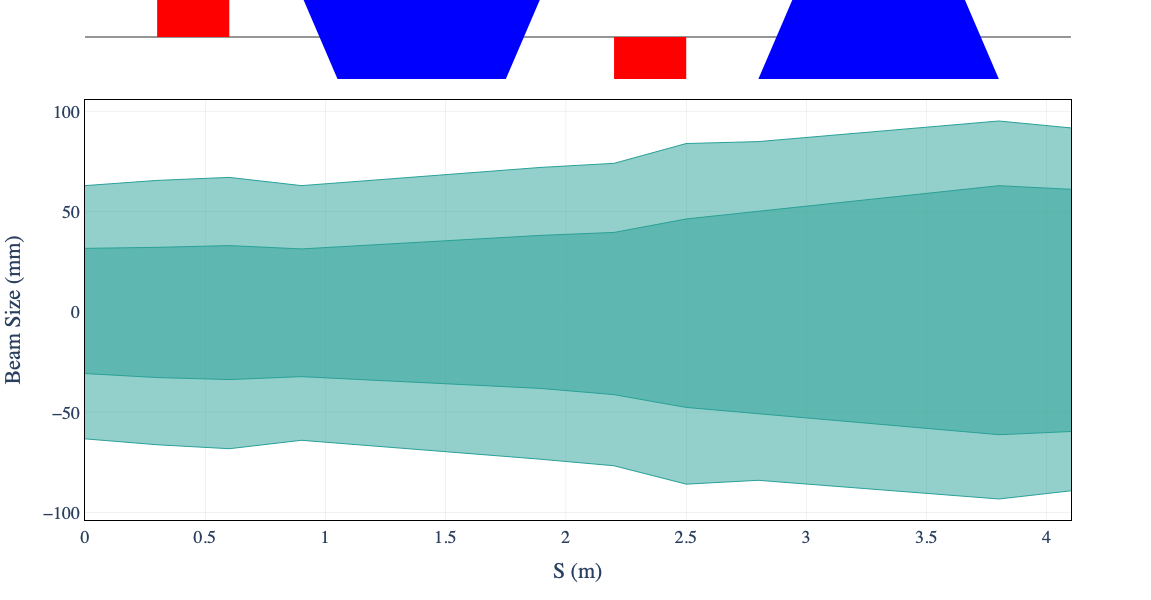

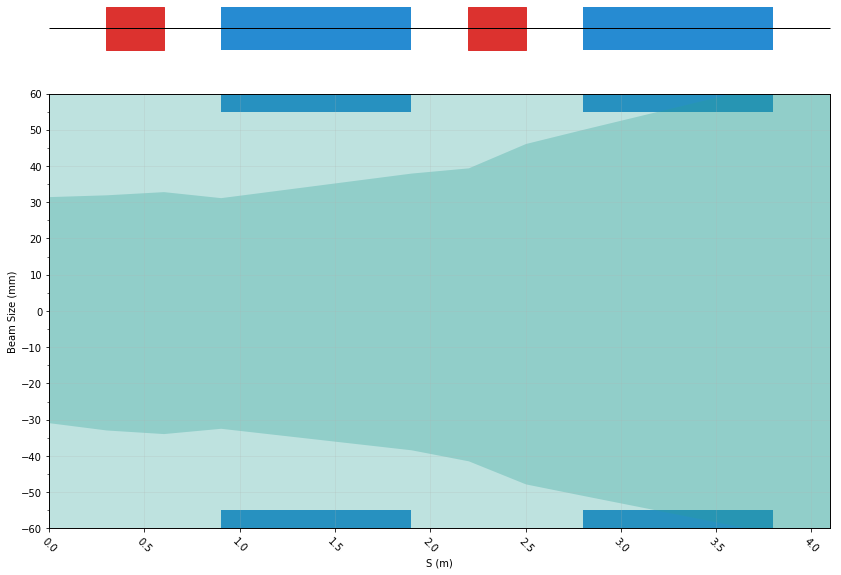

In [18]:
# Using Plotly
manzoni_plot = vis.ManzoniPlotlyArtist(width=800, height=600)
manzoni_plot.plot_cartouche(sequence.df, unsplit_bends=False, vertical_position=1.15)
manzoni_plot.tracking(beam_observer_beam, fill_between=False, plane='X', mean=False, std=False, halo=True) 
manzoni_plot.render()
manzoni_plot.save("figures/beam_observer_plotly.png", file_format='png')


# Using matplotlib
plt.rc('text', usetex=False)
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
manzoni_plot = vis.ManzoniMatplotlibArtist(ax=ax)
manzoni_plot.plot_cartouche(sequence.df) # Preparation of the plot
manzoni_plot.plot_beamline(sequence.df, print_label=False, with_aperture=True, plane='X') # Preparation of the plot
manzoni_plot.tracking(beam_observer_beam, fill_between=False, plane='X', mean=False, std=False, halo=True) 
fig.savefig("figures/beam_observer_matplotlib_both.png")

### Losses observer

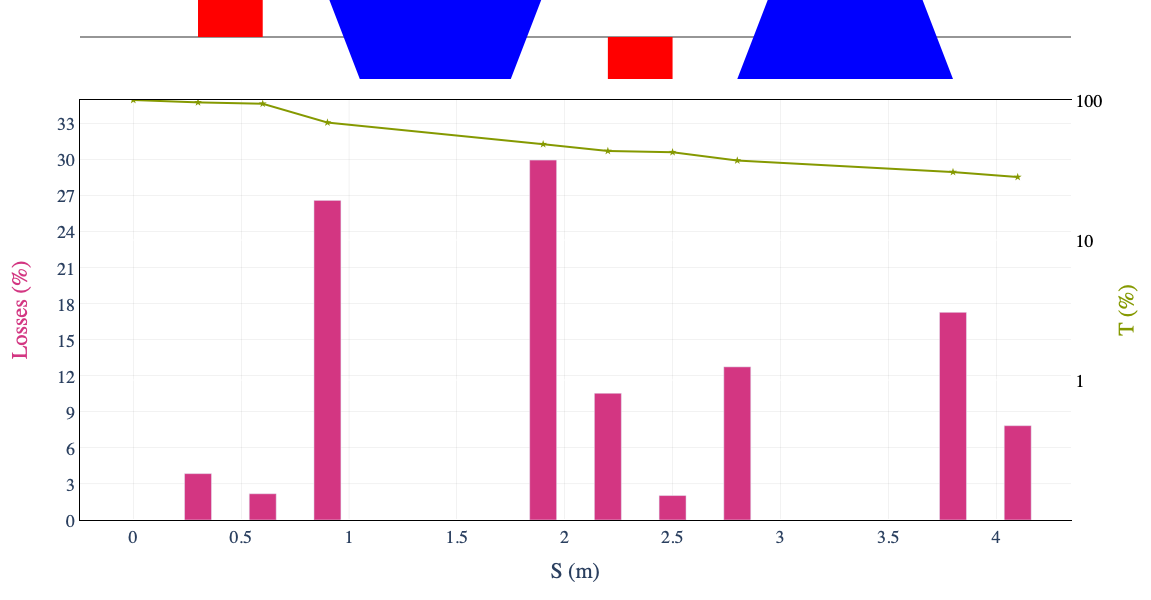

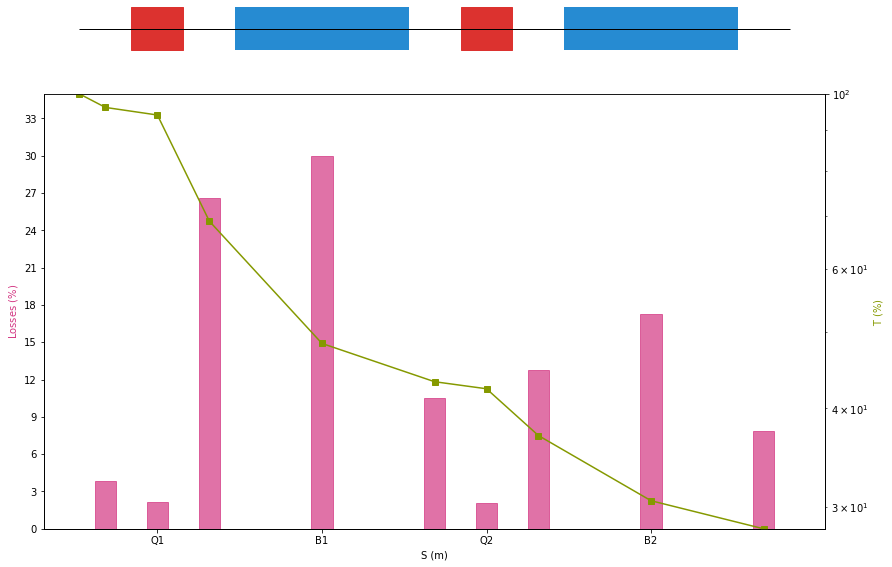

In [19]:
# Using Plotly
manzoni_plot = vis.ManzoniPlotlyArtist(width=800, height=600)
manzoni_plot.plot_cartouche(sequence.df, unsplit_bends=False, vertical_position=1.15)
manzoni_plot.losses(beam_observer_losses, log_scale=True) 
manzoni_plot.render()
manzoni_plot.save("figures/losses_observer_plotly.png", file_format='png')



# # Using matplotlib
plt.rc('text', usetex=False)
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
manzoni_plot = vis.ManzoniMatplotlibArtist(ax=ax)
manzoni_plot.plot_cartouche(sequence.df, print_label=True) # Preparation of the plot
manzoni_plot.losses(beam_observer_losses, log_scale=True) 
fig.savefig("figures/losses_observer_matplotlib_both.png")

## Phase space 

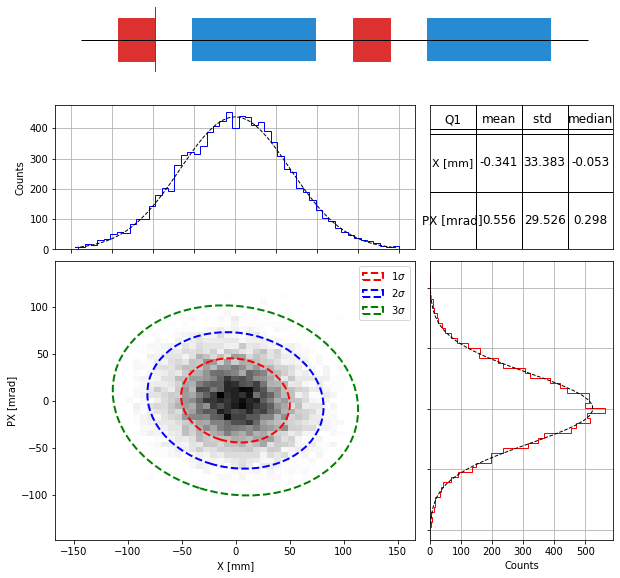

In [21]:
# Using matplotlib
plt.rc('text', usetex=False)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
manzoni_plot = vis.ManzoniMatplotlibArtist(ax=ax)
manzoni_plot.plot_cartouche(sequence.df) # Preparation of the plot
manzoni_plot.phase_space(observer=beam_observer_beam,
                         element='Q1', 
                         dim=['X', 'PX'], 
                         location='OUT', 
                         nbins=[51, 51])
fig.savefig("figures/phase_space_observer_matplotlib.png")



## Twiss

In [22]:
tw_observer = mi.track(beam=beam, observers=observers.TwissObserver())

ZeroDivisionError: division by zero

## Define his own observer

In [ ]:
class MyMeanObserver(georges.manzoni.Observer):
    def __init__(self, elements = None):
        super().__init__(elements)
        self.headers = ('NAME',
                        'AT_ENTRY',
                        'AT_CENTER',
                        'AT_EXIT',
                        'BEAM_IN_X',
                        'BEAM_OUT_X',
                        'BEAM_IN_Y',
                        'BEAM_OUT_Y',
                        'BEAM_IN_XP',
                        'BEAM_OUT_XP',
                        'BEAM_IN_YP',
                        'BEAM_OUT_YP',
                        'BEAM_IN_DPP',
                        'BEAM_OUT_DPP',
                        )

    def __call__(self, element, b1, b2):
        if super().__call__(element, b1, b2):
            self.data.append((element.NAME,
                              element.AT_ENTRY,
                              element.AT_CENTER,
                              element.AT_EXIT,
                              b1[:, 0].mean(),
                              b2[:, 0].mean(),
                              b1[:, 2].mean(),
                              b2[:, 2].mean(),
                              b1[:, 1].mean(),
                              b2[:, 1].mean(),
                              b1[:, 3].mean(),
                              b2[:, 3].mean(),
                              b1[:, 4].mean(),
                              b2[:, 4].mean(),
                              ))

### Track with our observer

In [ ]:
beam_Myobserver = mi.track(beam=beam, observers=MyMeanObserver())

### Plot the observer

In [ ]:
plt.rc('text', usetex=False)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

manzoni_plot = vis.ManzoniMatplotlibArtist(ax=ax)
manzoni_plot.plot_cartouche(sequence.df) # Preparation of the plot
manzoni_plot.plot_beamline(sequence.df, print_label=False, with_cartouche=True, with_aperture=False, plane='both') # Preparation of the plot


manzoni_plot.plot(beam_Myobserver.to_df()['AT_ENTRY'].apply(lambda e : e.m_as('m')), 
                  beam_Myobserver.to_df()['BEAM_IN_X'])

manzoni_plot.ax.set_xlabel("S (m)")
manzoni_plot.ax.set_ylabel("My data observed");